<a href="https://colab.research.google.com/github/GustavoDasa/Atividades/blob/Modelos_de_Regressao/Regress%C3%A3o_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy import stats

from matplotlib import rcParams

In [ ]:
# Descomente as linhas baixo para ter formatação em Latex em seus gráficos.
#rcParams['font.family'] = 'serif'
#rcParams['font.serif'] = 'Times'
#rcParams['svg.fonttype'] = 'none'
#plt.rc('text',usetex=True)

# mpl.rcParams['figure.dpi'] = 400
from IPython.display import display, Latex
display(Latex(f'$x_{1}$'))

<IPython.core.display.Latex object>

# Questão 5:

## item a)



/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


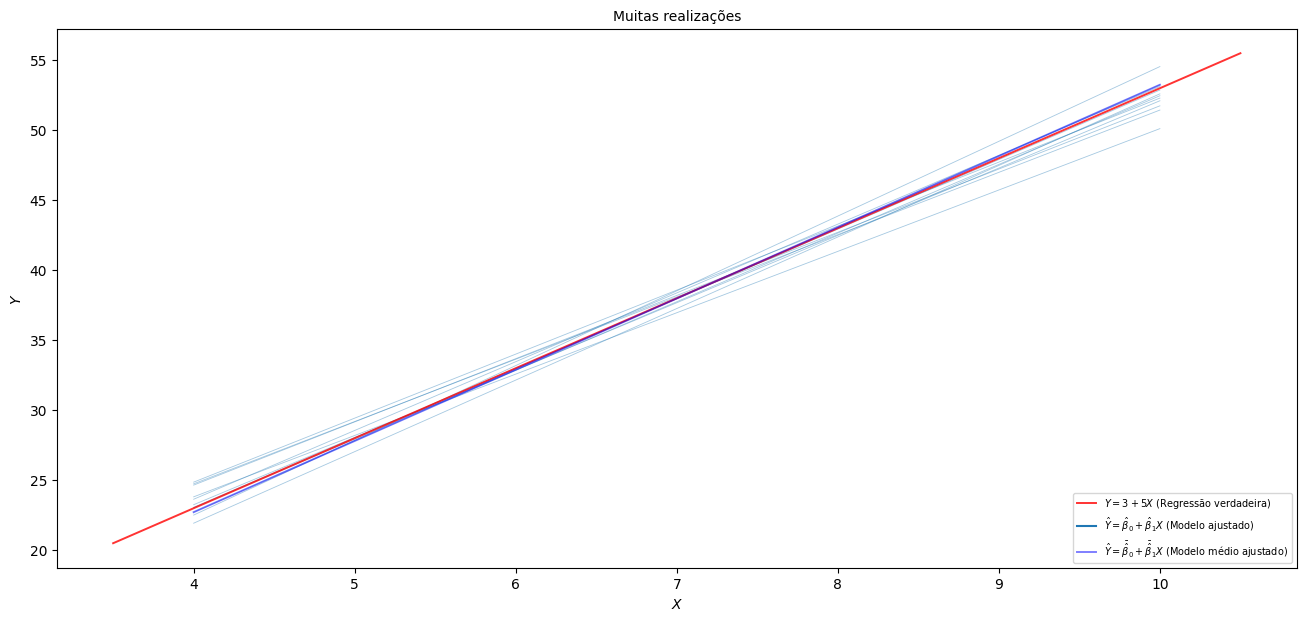

In [ ]:
number_experiments = 11
N = 10 # number of samples in each experiment

df = pd.DataFrame({'(X,Y)': [],
                   'b_0': [],
                   'b_1': []})

xinit, xfinal, intercepto, slope = 4, 10 ,3 , 5

X = np.linspace(xinit,xfinal,N)

fig = plt.figure(figsize=(16,7))
for exp in range(number_experiments):
    eps = np.random.normal(0,2,N) # ruido.

    # Population model - the true relationship in the data.
    Y = intercepto + slope*X + eps

    fit = stats.linregress(X,Y)   # ajustando o modelo aos dados.

    x = np.linspace(np.min(X),np.max(X),100) # x para plotar a reta ajustada.
    y_model = fit.intercept + fit.slope*x # reta ajustadas.

    df.loc[exp] = [ [(X[i],Y[i]) for i in range(len(Y))] , fit.intercept , fit.slope ]

    plt.plot(x,y_model,'-',color='C0',linewidth=0.6,alpha=0.4)
    plt.xlabel(r'$X$',fontsize=10)
    plt.ylabel(r'$Y$',fontsize=10)


### The true regression line ###
xlin = np.linspace(-0.5+ xinit,xfinal+0.5,100) # x data for the theoretical line.
ytrue = intercepto + slope*xlin

plt.title(r'Muitas realizações',fontsize=10)
plt.plot(xlin,ytrue,'-',color='red',linewidth=1.4, alpha=0.8 ,label=r'$Y = 3 + 5X$ (Regressão verdadeira)')
plt.plot([],[],'-',color='C0',label=r'$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X$ (Modelo ajustado)')


# Reta com a média dos estimadores:
# x = np.linspace(np.min(X)-0.2,np.max(X)+0.2,100) # x para plotar a reta ajustada.
# y_model = df['b_0'].mean() + np.mean(b_1)*x # reta ajustada.

plt.plot(x,y_model,'-',color='blue',linewidth=1.4, alpha =0.5, label=r'$\hat{Y} = \bar\hat{\beta}_0 + \bar\hat{\beta}_1 X$ (Modelo médio ajustado)' )


plt.legend(loc='lower right',fontsize=7)
plt.show()


### Tabela com as amostras

In [ ]:
df

,"(X,Y)",b_0,b_1
0,"[(4.0, 21.850535352866554), (4.666666666666667...",3.412004,4.905059
1,"[(4.0, 23.48928793372598), (4.666666666666667,...",1.153359,5.339280
2,"[(4.0, 20.442217497805647), (4.666666666666667...",3.189156,4.968402
3,"[(4.0, 21.224857895789647), (4.666666666666667...",1.485111,5.111194
4,"[(4.0, 26.769242684425805), (4.666666666666667...",6.943228,4.449686
5,"[(4.0, 25.249652162396785), (4.666666666666667...",6.592126,4.514974
6,"[(4.0, 23.111567981468085), (4.666666666666667...",4.015480,4.808891
7,"[(4.0, 25.0060897201396), (4.666666666666667, ...",3.990162,4.912720
8,"[(4.0, 21.76066844364211), (4.666666666666667,...",6.574759,4.572080
9,"[(4.0, 21.968100920771104), (4.666666666666667...",6.279547,4.383397


### Média e Desvio Padrão

In [ ]:
print('A média empírica e desvio padrão dos estimadores são:\n')
print('   real  mean  std')

display(Latex(r'$\hat\beta_0:\space\space%s  \space\space\|\space %%.2f \space\|\space %%%%.2f$'%str(intercepto) %df['b_0'].mean() %df['b_0'].std() ))
display(Latex(r'$\hat\beta_1:\space\space%s  \space\space\|\space %%.2f \space\|\space %%%%.2f$'%str(slope) %df['b_1'].mean() %df['b_1'].std()))

A média empírica e desvio padrão dos estimadores são:

   real  mean  std


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## item b)

In [ ]:
number_experiments = 10

df = pd.DataFrame({'N': [],
                   'b_0': [],
                   'b_1': []})

dk = pd.DataFrame({'b0m': [],
                   'b1m': [],
                   'std0':[],
                   'std1':[]})

indice = 0

amostras = [i for i in range(10,1000,10)]

xinit, xfinal, intercepto, slope = 4, 10 ,3 , 5

for N in amostras:
  X = np.linspace(xinit,xfinal,N)
  for exp in range(number_experiments):

    eps = np.random.normal(0,2,N) # ruido.

    # Population model - the true relationship in the data.
    Y = intercepto + slope*X + eps

    fit = stats.linregress(X,Y)   # ajustando o modelo aos dados.

    df.loc[indice] = [N , fit.intercept , fit.slope]
    indice += 1

  dk.loc[(indice/10)-1] = [  df[df['N']==N]['b_0'].mean() , df[df['N']==N]['b_1'].mean() , df[df['N']==N]['b_0'].std() , df[df['N']==N]['b_1'].std()]


### Gráfico

-----

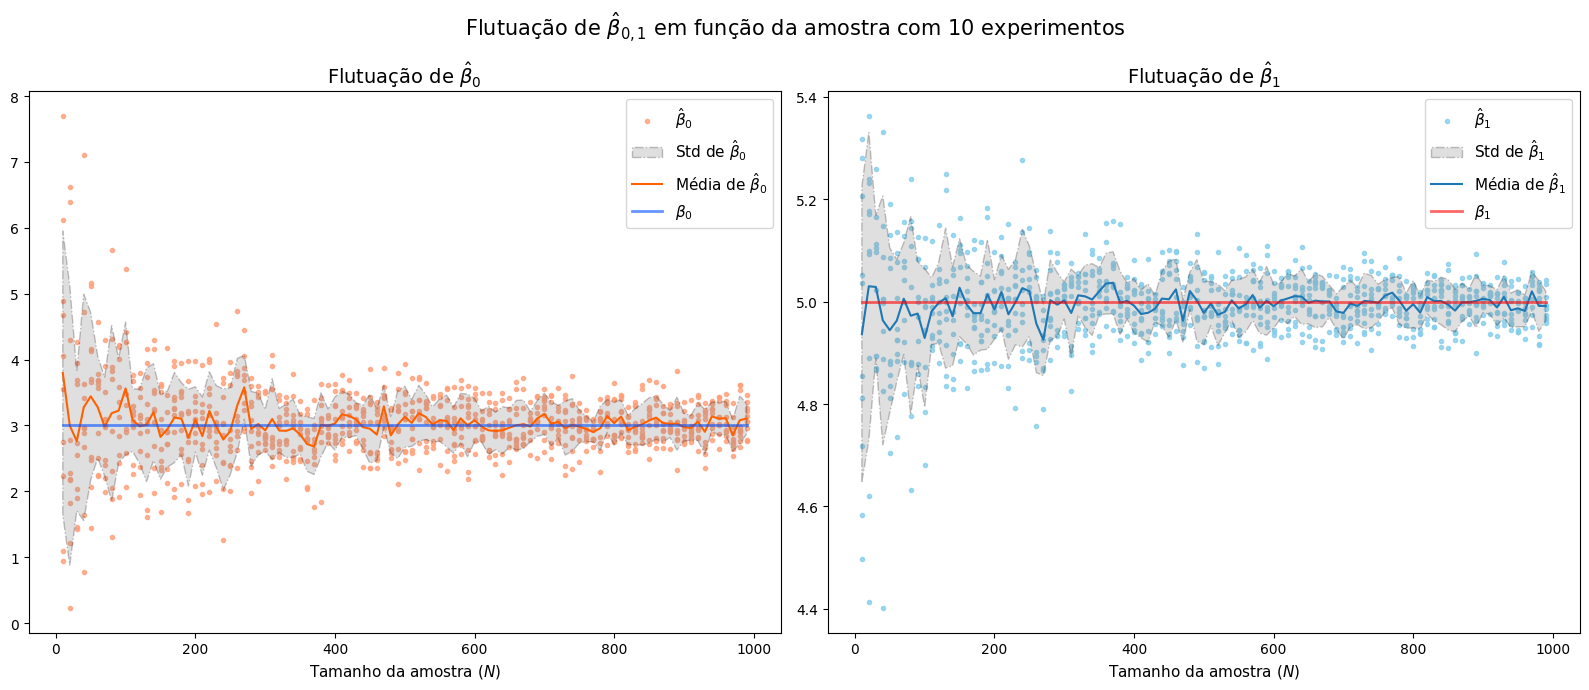

In [ ]:
fig = plt.figure(figsize=(16,7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


# Título #
plt.suptitle(r'Flutuação de $\hat{\beta}_{0,1}$ em função da amostra com '+str(number_experiments)+' experimentos' , fontsize=15)
ax1.set_title(r'Flutuação de $\hat{\beta}_0$',fontsize=14)  ;  ax2.set_title(r'Flutuação de $\hat{\beta}_1$',fontsize=14)



# Scatter #
ax1.scatter(df['N'],df['b_0'] , marker='.',color='#FFA07A',alpha = 0.8 ,label = r'$\hat{\beta}_0$')  ;  ax2.scatter(df['N'],df['b_1'] , marker='.' , color='#87CEEB',alpha = 0.8, label = r'$\hat{\beta}_1$')


# Desvio padrão #
ax1.fill_between(amostras , dk['b0m'] + dk['std0'] , dk['b0m'] - dk['std0'] , label = r'Std de $\hat{\beta}_0$', color='gray'  , alpha = 0.25 , edgecolor="#170808" ,linestyle = '-.')  ;  ax2.fill_between(amostras , dk['b1m'] + dk['std1'] , dk['b1m'] - dk['std1'] , label = r'Std de $\hat{\beta}_1$', color='gray'  , alpha = 0.25, edgecolor="#170808" ,linestyle = '-.')


# Linhas de média #
ax1.plot(amostras, dk['b0m'] ,'-',color='#FF6000', linewidth=1.5 , label = r'Média de $\hat{\beta}_0$')  ;  ax2.plot(amostras, dk['b1m'] ,'-',color='C100', linewidth=1.5 , label = r'Média de $\hat{\beta}_1$')



# Linhas do valor real #
ax1.plot(df['N'], np.linspace(3,3,len(df)) ,'-',color='#004EFF',linewidth=2 , label = r'$\beta_0$', alpha = 0.6)  ;  ax2.plot(df['N'], np.linspace(5,5,len(df)) ,'-',color='r', alpha = 0.6, linewidth=2  , label = r'$\beta_1$')


# Nomes dos Eixos #
ax1.set_xlabel(r'Tamanho da amostra $(N)$',fontsize=11)  ;  ax2.set_xlabel(r'Tamanho da amostra $(N)$',fontsize=11)



# Legendas
ax1.legend(fontsize=11)  ;  ax2.legend(fontsize=11)



plt.tight_layout()

### Considerações

Podemos observar que as flutuações dos estimadores $\hat\beta_{0,1}$ se aproximam do verdadeiro valor conforme o tamanho da amostra aumenta, bem como a sua média e desvio padrão.
Além disso, é notável que a escala de flutuação de $\hat\beta_0$ é maior que a de $\hat\beta_1$, assim como sua variação.

## item c)

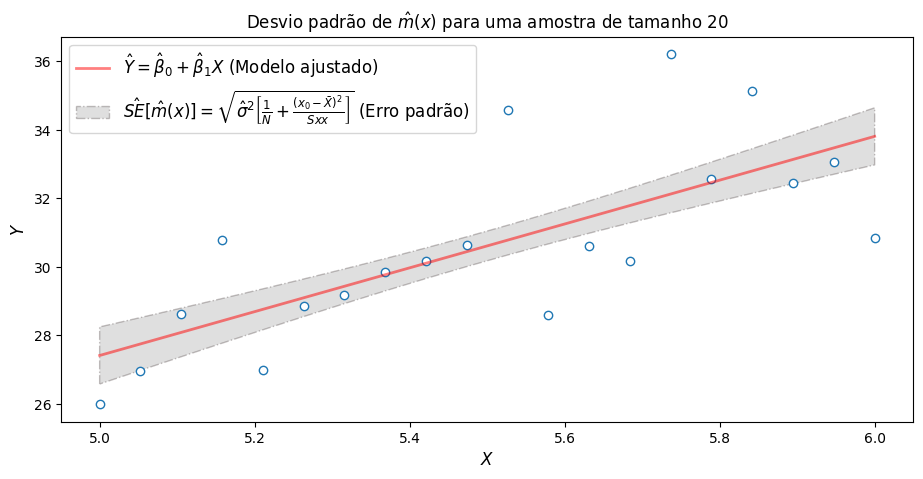

In [ ]:
### Verificar o SE da reta estimada

np.random.seed(35563)

fig = plt.figure(figsize=(11,5))
N = 20

eps = np.random.normal(0,2,N) # ruido.

xfinal = 6
xinit = 5
intercepto = 3
slope = 5

X = np.linspace(xinit,xfinal,N)

# Population model - the true relationship in the data.
Y = intercepto + slope*X + eps

fit = stats.linregress(X,Y)   # ajustando o modelo aos dados.
x = np.linspace(np.min(X),np.max(X),N) # x para plotar a reta ajustada.
y_model = fit.intercept + fit.slope*x # reta ajustadas.

### The true regression line ###
xlin = np.linspace(xinit,xfinal,N) # x data for the theoretical line.
ytrue = intercepto + slope*xlin


### one realization as example ###

plt.title(r'Desvio padrão de $\hat{m}(x)$ para uma amostra de tamanho '+str(N),fontsize=12)
plt.plot(X,Y,'o',markerfacecolor='white')
plt.plot(X,y_model,'-',color='r',linewidth=2,alpha=0.5,label=r'$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X$ (Modelo ajustado)')
plt.xlabel(r'$X$',fontsize=12)
plt.ylabel(r'$Y$',fontsize=12)


Sxx = np.sum((X-np.mean(X))**2)
SQres = np.sum( (Y - y_model  )**2)  # SSE

erro = []
for i in range(N):
  erro.append( ( SQres/(N-2)  * ( (1/N) +  ( ( ( X[i] - X.mean() )**2 ) / Sxx  )  )  )**(1/2))

plt.fill_between(X , y_model + erro , y_model - erro , label = r'$\hat{SE}[\hat{m}(x)] = \sqrt{ \hat{\sigma}^2\left[\frac{1}{N}+\frac{(x_0-\bar{X})^2}{Sxx}\right]}$ (Erro padrão)', color='gray'  , alpha = 0.25 , edgecolor="#170808" ,linestyle = '-.')


plt.legend(fontsize=12)
plt.show()



## item d)

In [ ]:
# teste
number_experiments = 10
N=100
sigma2 = 4
sigma = sigma2**(1/2)

df = pd.DataFrame({'Xfinal': [],
                   'b_0': [],
                   'b_1': [],
                   'Sxx': [],
                   'Var0': [],
                   'Var1': [],
                   'var0real': [],
                   'var1real': []})

dk = pd.DataFrame({'Sxx': [],
                   'b0m': [],
                   'b1m': [],
                   'var0':[],
                   'var1':[]})

eps=[]
for i in range(number_experiments):
  eps.append(np.random.normal( 0 , sigma , N )) # ruido.

indice = 0
for k in range(number_experiments):
  xinit, xfinal, intercepto, slope = 1, 3*(k+1) ,1 , 3
  for exp in range(number_experiments):

    X = np.linspace(xinit,xfinal,N)

    Y = intercepto + slope*X + eps[exp]

    fit = stats.linregress(X,Y)   # ajustando o modelo aos dados.
    x = np.linspace(np.min(X),np.max(X),N) # x para plotar a reta ajustada.
    y_model = fit.intercept + fit.slope*x # reta ajustadas.

    Sxx = np.sum( (X - np.mean(X))**2 )
    SQres = np.sum( (Y - y_model)**2 )  # SSE

    Var0 = ( SQres/(N-2) ) * ( (1/N) + ((np.mean(X))**2)/Sxx )
    Var1 = ( SQres/(N-2) ) / Sxx

    var0real = sigma2 * ( (1/N) + ((np.mean(X))**2)/Sxx )
    var1real = sigma2 / Sxx

    df.loc[indice] = [xfinal , fit.intercept , fit.slope , Sxx , Var0 , Var1 , var0real , var1real]
    indice += 1

  dk.loc[(indice/number_experiments)-1] = [ Sxx, df[df['Xfinal']==xfinal]['b_0'].mean() , df[df['Xfinal']==xfinal]['b_1'].mean() , df[df['Xfinal']==xfinal]['b_0'].var() , df[df['Xfinal']==xfinal]['b_1'].var()]

### Gráfico

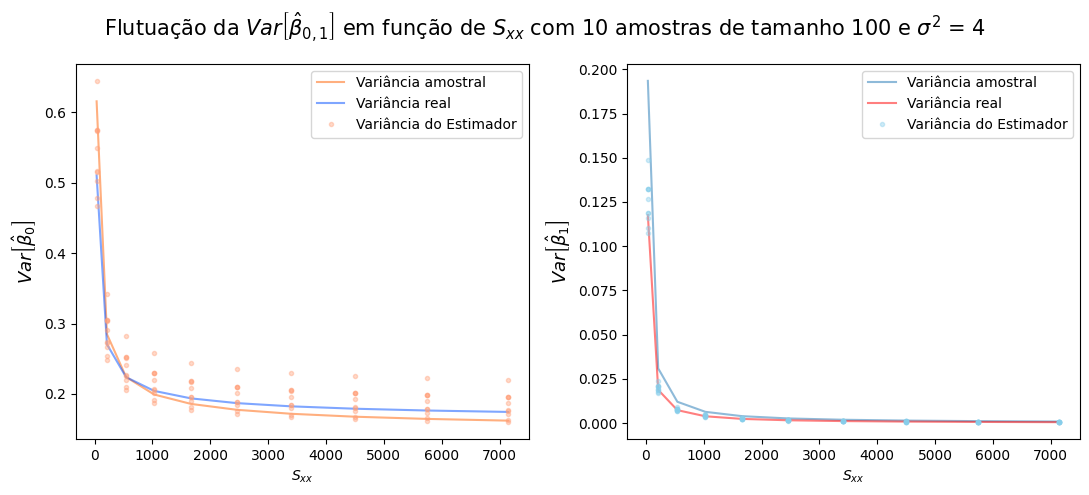

In [ ]:
fig = plt.figure(figsize=(11,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


plt.suptitle(r'Flutuação da $Var\left[\hat{\beta}_{0,1}\right]$ em função de $S_{xx}$ com '+str(number_experiments)+' amostras de tamanho '+str(N)+r' e $\sigma^2$ = '+str(sigma2), fontsize=15)


# Scatter #
ax1.plot(dk['Sxx'],dk['var0'] ,color='#FF6000',alpha = 0.5 ,label='Variância amostral')
ax2.plot(dk['Sxx'],dk['var1'] , color='C100',alpha = 0.5,label='Variância amostral')

ax1.plot(df['Sxx'],df['var0real'] ,'-',color='#004EFF',alpha = 0.5 ,label='Variância real')
ax2.plot(df['Sxx'],df['var1real'],'-' , color='r',alpha = 0.5,label='Variância real')

ax1.plot(df['Sxx'],df['Var0'] ,'.',color='#FFA07A',alpha = 0.4 ,label='Variância do Estimador')
ax2.plot(df['Sxx'],df['Var1'],'.' , color='#87CEEB',alpha = 0.4,label='Variância do Estimador')


# Nomes dos Eixos #
ax1.set_xlabel(r'$S_{xx}$',fontsize=10)
ax1.set_ylabel(r'$Var\left[\hat{\beta}_0\right]$',fontsize=13)
ax2.set_xlabel(r'$S_{xx}$',fontsize=10)
ax2.set_ylabel(r'$Var\left[\hat{\beta}_1\right]$',fontsize=13)


ax1.legend()
ax2.legend()

plt.tight_layout()

### Considerações

Comparando a Variância amostral do estimador (variância empírica) com a Variância do estimador quando seu range é expandido, observamos um mesmo comportamento para ambas, apesar da distância.

A distância de $\hat\beta_0$ para seu valor real pode ser explicada por $\bar{x}^2$ em sua composição, que se desloca para cima, devido ao crescimento do intervalo de $x$ apenas em seu limite superior, enquanto a Variância amostral utiliza apenas $\bar{x}$